In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from custom.plots import list_età_csv
from custom.watermarks import add_watermark
import locale

locale.setlocale(locale.LC_ALL, "it_IT.UTF-8")

'it_IT.UTF-8'

## Importa i dati

In [15]:
files = list_età_csv()

files

array(['../dati/data_iss_età_2021-07-14.csv',
       '../dati/data_iss_età_2021-07-21.csv',
       '../dati/data_iss_età_2021-07-28.csv',
       '../dati/data_iss_età_2021-08-04.csv',
       '../dati/data_iss_età_2021-08-11.csv',
       '../dati/data_iss_età_2021-08-18.csv',
       '../dati/data_iss_età_2021-08-25.csv',
       '../dati/data_iss_età_2021-09-01.csv',
       '../dati/data_iss_età_2021-09-08.csv',
       '../dati/data_iss_età_2021-09-15.csv',
       '../dati/data_iss_età_2021-09-22.csv',
       '../dati/data_iss_età_2021-09-29.csv',
       '../dati/data_iss_età_2021-10-06.csv'], dtype='<U35')

## Genera gli andamenti per categoria e per fasce d'età

In [16]:
def ricava_andamenti_età(files, età, colonna, incidenza_settimanale):
    
    from custom.plots import date_from_csv_path, list_età_csv
    
    # create dates
    dates = []
    for f in files:
        dates.append(date_from_csv_path(f))
        
    # loop around the .csv files
    results_date = []
    for i in range(len(files)):
        df = pd.read_csv(files[i], sep=';')
        df = df[df['età']==età]

        non_vacc_labels = ['casi non vaccinati', 'ospedalizzati non vaccinati', 
                'terapia intensiva non vaccinati', 'decessi non vaccinati']

        vacc_labels = ['casi vaccinati', 'ospedalizzati vaccinati', 
                       'terapia intensiva vaccinati', 'decessi vaccinati']

        if incidenza_settimanale == True:
            # calcola incidenza settimanale ogni 100.000 abitanti per ciascun gruppo
            df[non_vacc_labels] = 7/30*df[non_vacc_labels]/df['non vaccinati'].values[0]*10**5
            df[vacc_labels] = 7/30*df[vacc_labels]/df['vaccinati completo'].values[0]*10**5
        else:
            df[colonna] = df[colonna]/30  # converti in numeri giornalieri, media mobile 30 giorni      
        
        result_single_date = [dates[i], np.array(df[colonna])[0]]
        results_date.append(result_single_date)

    df_results = pd.DataFrame(results_date)
    
    if incidenza_settimanale == True:
        df_results.columns = ['date', 'incidenza '+str(colonna)+', '+str(età)]
    else:
        df_results.columns = ['date', str(colonna)+', '+str(età)]
    
    df_results.index = pd.to_datetime(df_results['date'])
    df_results.drop('date', axis=1, inplace=True)
    
    return df_results

## Risultati

In [17]:
plt.style.use('seaborn-dark')

### Casi giornalieri

In [27]:
def plot_assoluti_incidenza_età(categorie, titoli, filename):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    ricava_andamenti_età(files, '12-39', categorie[0], incidenza_settimanale = False).plot(ax=axes[0], 
                                                                                color='blue')
    ricava_andamenti_età(files, '40-59', categorie[0], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='orange')
    ricava_andamenti_età(files, '60-79', categorie[0], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='green')
    ricava_andamenti_età(files, '80+', categorie[0], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='red')
    ricava_andamenti_età(files, '12-39', categorie[1], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='blue', linestyle='--')
    ricava_andamenti_età(files, '40-59', categorie[1], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='orange', linestyle='--')
    ricava_andamenti_età(files, '60-79', categorie[1], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='green', linestyle='--')
    ricava_andamenti_età(files, '80+', categorie[1], incidenza_settimanale = False).plot(ax=axes[0],
                                                                                color='red', linestyle='--')

    axes[0].set_title(titoli[0])
    axes[0].legend(['12-39 noV', '40-59 noV', '60-79 noV', '80+ noV', '12-39 V', '40-59 V', '60-79 V', '80+ V'])
    axes[0].grid()
    axes[0].set_xlabel('')

    ricava_andamenti_età(files, '12-39', categorie[0], incidenza_settimanale = True).plot(ax=axes[1], 
                                                                                color='blue')
    ricava_andamenti_età(files, '40-59', categorie[0], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='orange')
    ricava_andamenti_età(files, '60-79', categorie[0], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='green')
    ricava_andamenti_età(files, '80+', categorie[0], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='red')
    ricava_andamenti_età(files, '12-39', categorie[1], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='blue', linestyle='--')
    ricava_andamenti_età(files, '40-59', categorie[1], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='orange', linestyle='--')
    ricava_andamenti_età(files, '60-79', categorie[1], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='green', linestyle='--')
    ricava_andamenti_età(files, '80+', categorie[1], incidenza_settimanale = True).plot(ax=axes[1],
                                                                                color='red', linestyle='--')
    axes[1].set_title(titoli[1])
    axes[1].grid()
    axes[1].legend(['12-39 noV', '40-59 noV', '60-79 noV', '80+ noV', '12-39 V', '40-59 V', '60-79 V', '80+ V'])
    axes[1].set_xlabel('')
    
    ax = plt.gca()
    add_watermark(fig, ax.xaxis.label.get_fontsize())
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

watermark fontsize: 23, angle:-26.57


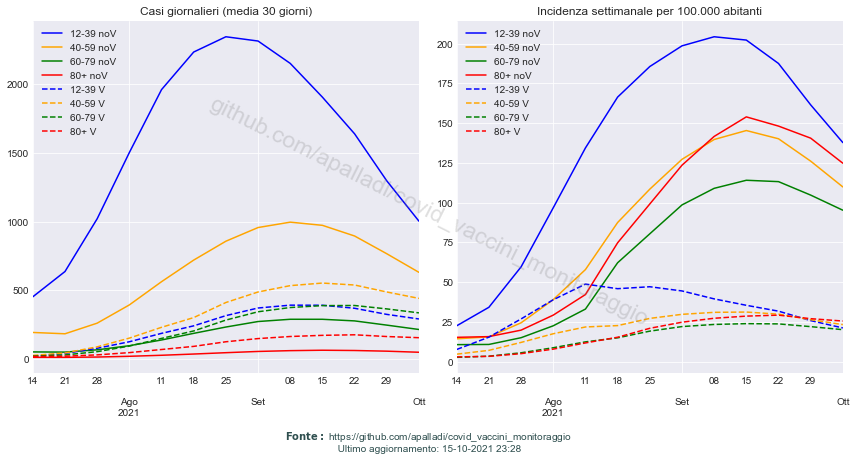

In [28]:
categorie = ['casi non vaccinati', 'casi vaccinati']
titoli = ['Casi giornalieri (media 30 giorni)', 'Incidenza settimanale per 100.000 abitanti']

plot_assoluti_incidenza_età(categorie, titoli, filename='../risultati/andamento_fasce_età_casi.png')

watermark fontsize: 23, angle:-26.57


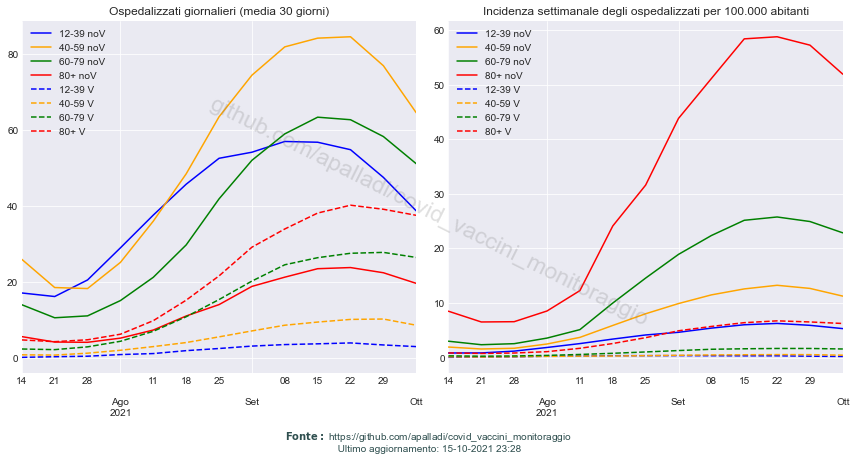

In [29]:
categorie = ['ospedalizzati non vaccinati', 'ospedalizzati vaccinati']
titoli = ['Ospedalizzati giornalieri (media 30 giorni)', 'Incidenza settimanale degli ospedalizzati per 100.000 abitanti']

plot_assoluti_incidenza_età(categorie, titoli, filename='../risultati/andamento_fasce_età_ospedalizzati.png')

watermark fontsize: 23, angle:-26.57


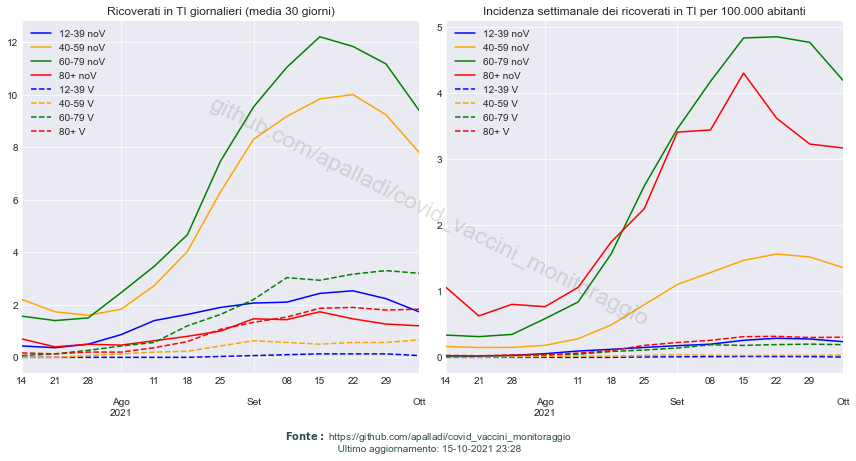

In [30]:
categorie = ['terapia intensiva non vaccinati', 'terapia intensiva vaccinati']
titoli = ['Ricoverati in TI giornalieri (media 30 giorni)', 'Incidenza settimanale dei ricoverati in TI per 100.000 abitanti']

plot_assoluti_incidenza_età(categorie, titoli, filename='../risultati/andamento_fasce_età_ricoveratiTI.png')

watermark fontsize: 23, angle:-26.57


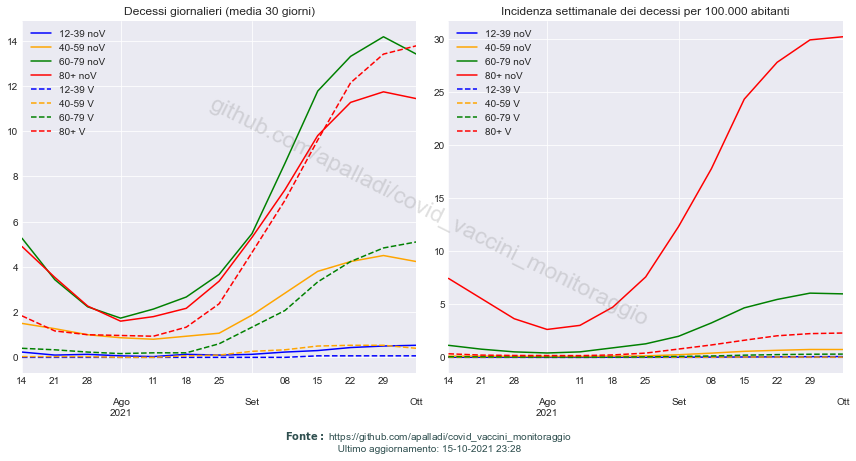

In [31]:
categorie = ['decessi non vaccinati', 'decessi vaccinati']
titoli = ['Decessi giornalieri (media 30 giorni)', 'Incidenza settimanale dei decessi per 100.000 abitanti']

plot_assoluti_incidenza_età(categorie, titoli, filename='../risultati/andamento_fasce_età_decessi.png')